##### 凸透鏡效果 ( 魚眼效果、大頭狗效果 )
這篇教學會透過 OpenCV 取得影像的像素內容和位置，搭配數學式的運算，計算出特定半徑內的凸透鏡成像，實作出類似魚眼或大頭狗的趣味效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 凸透鏡效果的公式 
定義一個「圓形」作為凸透鏡效果的範圍，根據圓形內每個點與中心點的距離，決定要形變的程度，越靠近外側變形越小，越靠近中心點變形程度越大，\
就可以做出凸透鏡的效果。

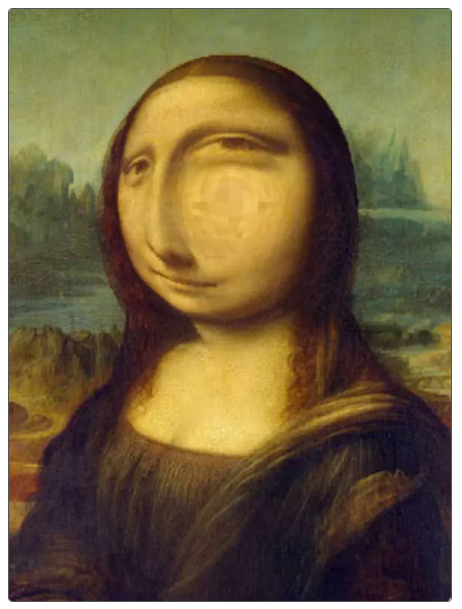

In [ ]:
import cv2
import numpy as np

def convex(src_img, raw, effect):  # 定義凸透鏡函數
    col, row, channel = raw[:]      # 取得圖片資訊
    cx, cy, r = effect[:]           # 取得凸透鏡的範圍
    output = np.zeros([row, col, channel], dtype = np.uint8)        # 產生空白畫布
    for y in range(row):    # 進行每個點的計算
        for x in range(col):    # 進行每個點的計算
            d = ((x - cx) * (x - cx) + (y - cy) * (y - cy)) ** 0.5  # 計算每個點與中心點的距離
            if d <= r:  # 如果在半徑範圍之內
                nx = int((x - cx) * d / r + cx)        # 根據不同的位置，產生新的 nx，越靠近中心形變越大
                ny = int((y - cy) * d / r + cy)        # 根據不同的位置，產生新的 ny，越靠近中心形變越大
                output[y, x, :] = src_img[ny, nx, :]   # 產生新的圖
            else:
                output[y, x, :] = src_img[y, x, :]     # 如果在半徑範圍之外，原封不動複製過去
    return output

img = cv2.imread('meme_1.jpg')
img = convex(img, (236, 236, 3), (150, 130, 100))      # 提交參數數值，進行凸透鏡效果
cv2.imshow('oxxostudio', img)
cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()

##### 即時動態的凸透鏡效果 
將靜態影像改成擷取攝影機畫面，就能做出即時動態的凸透鏡效果 ( 因為需要即時計算每個像素，影像尺寸太大可能會有效能的問題 )。

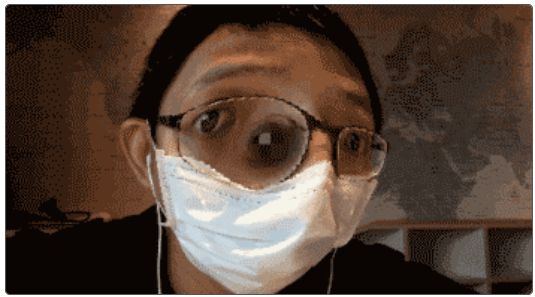

In [ ]:
import cv2
import numpy as np

def convex(src_img, raw, effect):   # 定義凸透鏡函數
    col, row, channel = raw[:]    # 取得圖片資訊
    cx, cy, r = effect[:]      # 取得凸透鏡的範圍
    output = np.zeros([row, col, channel], dtype = np.uint8)    # 產生空白畫布
    for y in range(row):    # 進行每個點的計算
        for x in range(col):    # 進行每個點的計算
            d = ((x - cx) * (x - cx) + (y - cy) * (y - cy)) ** 0.5  # 計算每個點與中心點的距離
            if d <= r:  # 如果在半徑範圍之內
                nx = int((x - cx) * d / r + cx)   # 根據不同的位置，產生新的 nx，越靠近中心形變越大
                ny = int((y - cy) * d / r + cy)  # 根據不同的位置，產生新的 ny，越靠近中心形變越大
                output[y, x, :] = src_img[ny, nx, :]    # 產生新的圖
            else:   # 如果在半徑範圍之外
                output[y, x, :] = src_img[y, x, :]  # 原封不動複製過去
    return output   # 回傳結果

cap = cv2.VideoCapture('1080_1920_30fps.mp4')
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, img = cap.read()               # 讀取影片的每一幀
    if not ret:
        print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
        break
    scale = 0.75                      # 縮放比例
    w, h = int(640*scale), int(320*scale)   # 設定寬與高
    cw, ch = int(w/2), int(h/2)            # 取得中心點
    img = cv2.resize(img,(w, h))           # 調整尺寸，加快速度
    img = convex(img, (w, h, 3), (cw, ch, 100)) # 提交參數數值，進行凸透鏡效果
    cv2.imshow('oxxostudio', img)
    if cv2.waitKey(100) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()